# Pymaceuticals Inc.
---

### Analysis

Observations/Inferences from the Data:

Promising Treatment Regimens: The data analysis reveals that the treatment of Capomulin and Ramicane were considered the most promising for squamous cell carcinoma (SCC) in mice than Infubinol and Ceftamin. These treatments were chosen based on their efficacy in reducing tumor volume. This suggests that these regimens warrant further investigation for potential human applications in treating skin cancer.

Gender Distribution: The study included an approximately equal distribution of male and female mice, indicating that the research aimed to account for potential gender-specific effects in drug response. This gender balance is essential for ensuring the generalizability of the study's findings to both genders.

Correlation between Weight and Tumor Volume: The analysis of the Capomulin regimen demonstrates a negative correlation between mouse weight and tumor volume. Heavier mice tend to have larger tumor volumes, suggesting that weight may be a factor influencing tumor development. This insight can guide further research into understanding the relationship between body weight and treatment response in skin cancer.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame


# Display the data table for preview


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Checking the number of mice.
mouse_metadata['Mouse ID'].nunique()

249

In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
t = study_results[study_results[['Mouse ID', 'Timepoint']].duplicated()]
t['Mouse ID'].unique()

array(['g989'], dtype=object)

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
t = study_results[study_results[['Mouse ID', 'Timepoint']].duplicated()]
t['Mouse ID'].unique()

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
_filter = study_results['Mouse ID'] == 'g989'
merged_df = study_results.merge(mouse_metadata, how='left', on='Mouse ID')
merged_df[_filter]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

merged_df[~_filter].head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
merged_df[~_filter]['Mouse ID'].nunique()

248

## Summary Statistics

In [10]:
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
_mean = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
_median = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
_var = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
_std = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
_sem = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

pd.DataFrame({
    "Mean Tumor Volume": _mean,
    "Median Tumor Volume": _median,
    "Tumor Volume Variance": _var,
    "Tumor Volume Std. Dev.": _std,
    "Tumor Volume Std. Err.": _sem
})

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
(
    merged_df
    .groupby("Drug Regimen")
    ["Tumor Volume (mm3)"]
    .agg(
        Mean_Tumor_Volume="mean",
        Median_Tumor_Volume="median",
        Tumor_Volume_Variance="var",
        Tumor_Volume_Std_Dev="std",
        Tumor_Volume_Std_Err="sem"
    )
    #.agg([
    #   "mean",
    #   "median",
    #   "var",
    #   "std",
    #   "sem"
    #])
    # .rename({
    #     "mean": "Mean Tumor Volume",
    #     "median": "Median Tumor Volume",
    #     "var": "Tumor Volume Variance",
    #     "std": "Tumor Volume Std. Dev.",
    #     "sem": "Tumor Volume Std. Err."
    # }, axis=1)
)

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [13]:
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


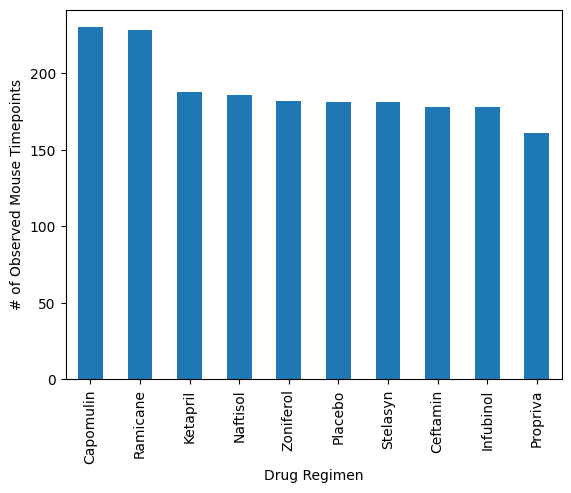

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

_ = (
    merged_df
    .groupby("Drug Regimen")
    ["Timepoint"]
    .count()
    .sort_values(ascending=False)
    .plot
    .bar(ylabel="# of Observed Mouse Timepoints")
)
plt.show()

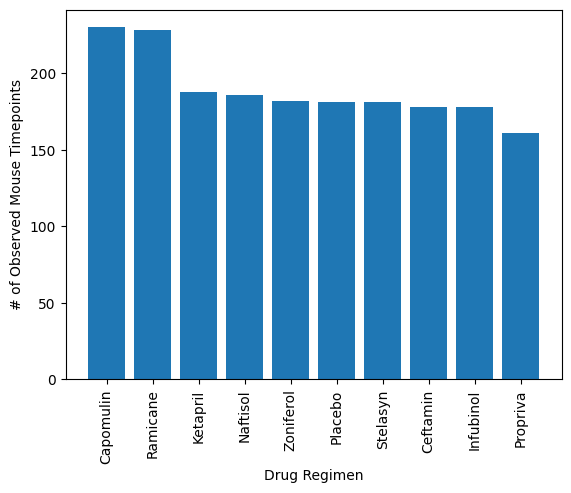

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
aux = merged_df.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)
fig, ax = plt.subplots()
_ = plt.bar(aux.index, aux.values)
_ = plt.xlabel("Drug Regimen")
_ = plt.xticks(rotation='vertical')
_ = plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

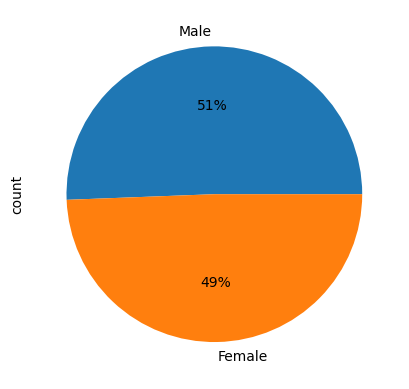

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
_ = merged_df['Sex'].value_counts().plot.pie(autopct="%1.0f%%")

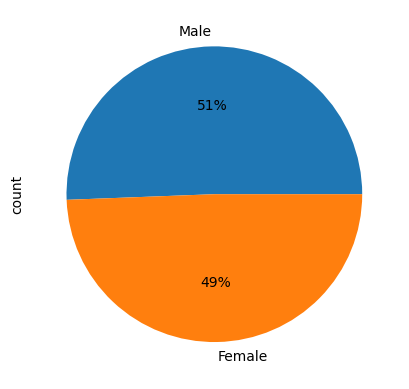

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
aux = merged_df['Sex'].value_counts()
fig, ax = plt.subplots()
_ = plt.pie(aux.values, labels=aux.index, autopct="%1.0f%%")
_ = plt.ylabel("count")
# _ = plt.xlabel("Drug Regimen")
# _ = plt.xticks(rotation='vertical')
# _ = plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
merged_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [19]:
max_timepoint = (
    merged_df
    .groupby("Mouse ID")
    ["Timepoint"]
    .max()
)


In [20]:
max_timepoint.reset_index()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [21]:
merged_df.merge(max_timepoint, how='right', on=['Mouse ID', 'Timepoint'])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = (
    merged_df
    .groupby("Mouse ID")
    ["Timepoint"]
    .max()
)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_tpt_merged_df = merged_df.merge(max_timepoint, how='right', on=['Mouse ID', 'Timepoint'])

In [23]:
max_tpt_merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [24]:
regimen_values = ("Capomulin", "Ramicane", "Infubinol", "Ceftamin")
(
    max_tpt_merged_df
    [max_tpt_merged_df["Drug Regimen"].isin(regimen_values)]
    .groupby("Drug Regimen")
    ["Tumor Volume (mm3)"]
    .apply(list)
)


Drug Regimen
Capomulin    [38.98287774, 38.93963263, 30.48598484, 37.074...
Ceftamin     [62.99935619, 45.0, 56.05774909, 55.74282869, ...
Infubinol    [67.97341878, 65.52574285, 57.03186187, 66.083...
Ramicane     [38.4076183, 43.0475426, 38.81036633, 32.97852...
Name: Tumor Volume (mm3), dtype: object

In [25]:
values_s = (
    max_tpt_merged_df
    [max_tpt_merged_df["Drug Regimen"].isin(regimen_values)]
    .groupby("Drug Regimen")
    ["Tumor Volume (mm3)"]
    .apply(list)
)

In [26]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

for i, val in values_s.items():
    q1 = st.scoreatpercentile(val, 25)
    q3 = st.scoreatpercentile(val, 75)
    iqr = q3 - q1
    inf = q1 - 1.5 * iqr
    sup = q3 + 1.5 * iqr
    
    filtered_values = filter(lambda x: ((x < inf) or (x > sup)), val)
    print(f"{i}'s potential outliers: {pd.Series(filtered_values)}")

Capomulin's potential outliers: Series([], dtype: object)
Ceftamin's potential outliers: Series([], dtype: object)
Infubinol's potential outliers: 0    36.321346
dtype: float64
Ramicane's potential outliers: Series([], dtype: object)


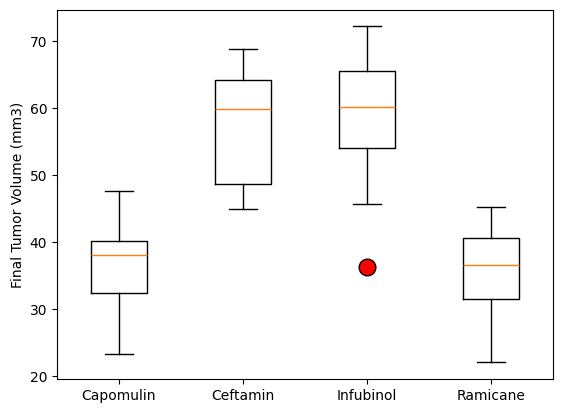

In [27]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
_ = plt.boxplot(values_s.values, labels=values_s.index, flierprops={
    'marker': 'o',
    'markersize': 12,
    'markerfacecolor': 'red'
})
_ = plt.ylabel("Final Tumor Volume (mm3)")


## Line and Scatter Plots

In [28]:
ids = merged_df[merged_df["Drug Regimen"] == "Capomulin"]["Mouse ID"].unique()
ids

array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'], dtype=object)

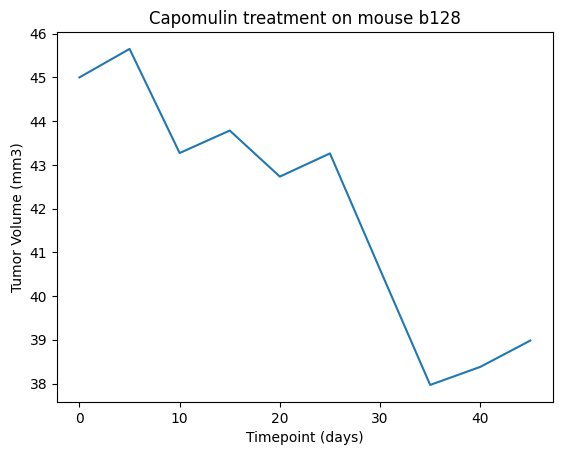

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
ID = 'b128'
filter_id = merged_df["Mouse ID"] == ID
_ = (
    merged_df
    [filter_id]
    [["Timepoint", "Tumor Volume (mm3)"]]
    .plot
    .line(x="Timepoint")
)
_ = plt.xlabel("Timepoint (days)")
_ = plt.ylabel("Tumor Volume (mm3)")
_ = plt.title(f"Capomulin treatment on mouse {ID}")
plt.legend().remove()

In [30]:
merged_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [31]:
filter_cap = merged_df["Drug Regimen"] == "Capomulin"
avg_tumor_vol_by_weight = (
    merged_df
    [filter_cap]
    .groupby("Weight (g)")
    ["Tumor Volume (mm3)"]
    .mean()
)

avg_tumor_vol_by_weight

Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weights = merged_df[filter_cap]["Weight (g)"].sort_values().unique()

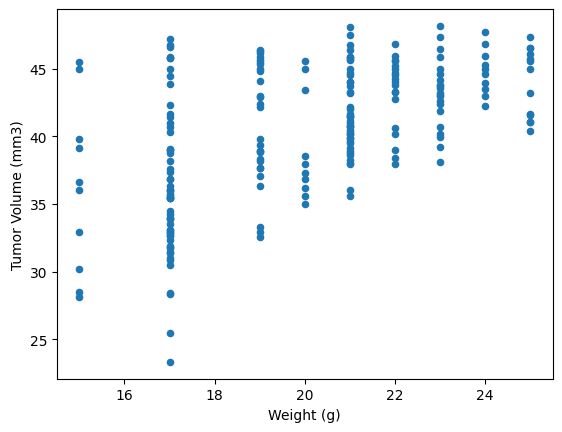

In [33]:
_ = (
    merged_df
    [(merged_df['Weight (g)'].isin(weights)) & filter_cap]
    [['Weight (g)', 'Tumor Volume (mm3)']]
    .drop_duplicates()
    .plot
    .scatter(
        x='Weight (g)', y='Tumor Volume (mm3)'
    )
)



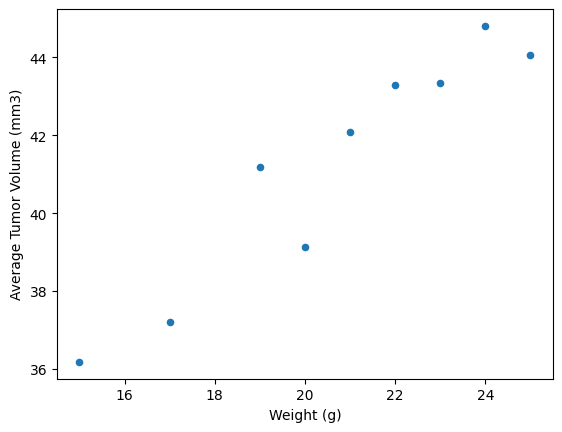

In [34]:
(
    merged_df
    [(merged_df['Weight (g)'].isin(weights)) & filter_cap]
    [['Weight (g)', 'Tumor Volume (mm3)']]
    .groupby('Weight (g)')
    .mean()
    .reset_index()
    .plot
    .scatter(x='Weight (g)', y='Tumor Volume (mm3)')
)

_ = plt.ylabel("Average Tumor Volume (mm3)")

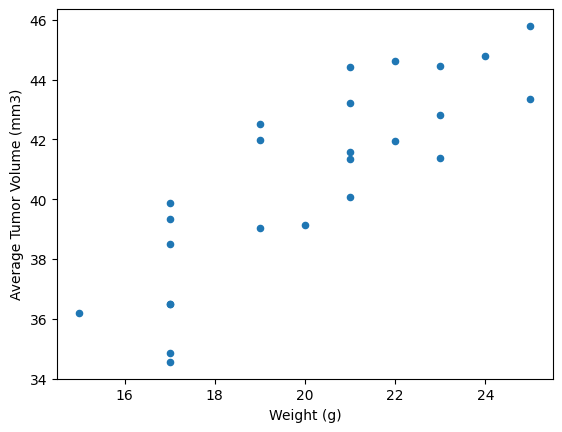

In [35]:
data = (
    merged_df
    [(merged_df['Weight (g)'].isin(weights)) & filter_cap]
    [['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
    .groupby(['Weight (g)', 'Mouse ID'])
    .mean()
    .reset_index(level=[0,1])
)


_ = (   
    data    
    .plot
    .scatter(x="Weight (g)", y="Tumor Volume (mm3)", ylabel="Average Tumor Volume (mm3)")
)

## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

corr = data[['Weight (g)', 'Tumor Volume (mm3)']].corr().loc["Weight (g)", "Tumor Volume (mm3)"]
print(f"The correlation between weight and average observed tumor volume is: {corr}")

The correlation between weight and average observed tumor volume is: 0.841936342469472


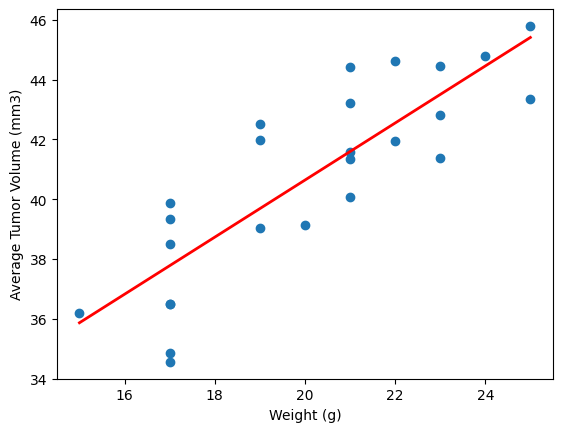

In [37]:
x = data['Weight (g)']
y = data['Tumor Volume (mm3)']

slope, intercept, r_value, p_value, std_err = st.linregress(x, y)

plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
_ = plt.plot(x, intercept + slope * x, color='red', linewidth=2)